In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [116]:
# Loaded variable 'df_raw' from URI: /Users/ignacio/kaggle/houseprices/data/train.csv
df_raw = pd.read_csv(r"/Users/ignacio/kaggle/houseprices/data/train.csv")


def prepare_data(
    df: pd.DataFrame, *, for_training: bool = True
) -> pd.DataFrame:
    # Change column type to category for column: 'MSZoning'
    df = df.astype({"MSZoning": "category"})

    # Change column type to category for column: 'MSSubClass'
    df = df.astype({"MSSubClass": "category"})

    # Replace missing values with 0 in column: 'LotFrontage'
    df = df.fillna({"LotFrontage": 0})

    # Filter rows based on column: 'LotArea'
    if for_training:
        df = df[df["LotArea"] <= 50000]
    else:
        df["LotArea"] = df["LotArea"].clip(upper=50000)

    # Change column type to category for column: 'Street'
    df = df.astype({"Street": "category"})

    # Replace missing values with "NA" in column: 'Alley'
    df = df.fillna({"Alley": "NA"})
    df = df.astype({"Alley": "category"})

    # Change column type to category for column: 'LotShape'
    df = df.astype({"LotShape": "category"})

    # Change column type to category for column: 'LandContour'
    df = df.astype({"LandContour": "category"})

    # Change column type to category for column: 'Utilities'
    df = df.astype({"Utilities": "category"})

    # Change column type to category for column: 'LotConfig'
    df = df.astype({"LotConfig": "category"})

    # Change column type to category for column: 'GarageType'
    df = df.fillna({"GarageType": "NA"})
    df = df.astype({"GarageType": "category"})
    # set garageYrBlt missing to 0
    df = df.fillna({"GarageYrBlt": 0})

    df = df.astype({"LandSlope": "category"})

    df = df.astype({"Neighborhood": "category"})

    df = df.astype({"Condition1": "category"})

    df = df.astype({"Condition2": "category"})

    df = df.astype({"BldgType": "category"})

    df = df.astype({"HouseStyle": "category"})

    df = df.astype({"OverallQual": "int8"})

    df = df.astype({"OverallCond": "int8"})

    # introduce year build from columns 'YearBuilt' parse as time
    df["x_YearBuilt"] = pd.to_datetime(df["YearBuilt"], format="%Y")
    # MasVnrArea
    df = df.fillna({"MasVnrArea": 0})
    # drop where MasVnrArea > 720
    if for_training:
        df = df[df["MasVnrArea"] <= 720]
    else:
        df["MasVnrArea"] = df["MasVnrArea"].clip(upper=720)
    df["x_YearRemodAdd"] = pd.to_datetime(df["YearRemodAdd"], format="%Y")

    # RoofStyle
    df = df.astype({"RoofStyle": "category"})

    # CentralAir
    df = df.astype({"CentralAir": "category"})
    # Electrical
    df = df.astype({"Electrical": "category"})

    df = df.astype({"RoofMatl": "category"})

    df = df.astype({"Exterior1st": "category"})

    df = df.astype({"Exterior2nd": "category"})

    # set missing values in 'MasVnrType' to "None"
    df = df.fillna({"MasVnrType": "None"})
    df = df.astype({"MasVnrType": "category"})

    df = df.astype({"ExterQual": "category"})
    df = df.astype({"ExterCond": "category"})

    df = df.astype({"Foundation": "category"})

    # BsmtFinType1    31
    df = df.fillna({"BsmtFinType1": "NA"})
    df = df.astype({"BsmtFinType1": "category"})
    # GarageType      59
    # df = df.fillna({"GarageType": "NA"})
    df = df.astype({"GarageType": "category"})
    # GarageCond      59
    df = df.fillna({"GarageCond": "NA"})
    df = df.astype({"GarageCond": "category"})
    # set missing values in 'BsmtQual' to "NA"
    df = df.fillna({"BsmtQual": "NA"})
    df = df.astype({"BsmtQual": "category"})

    df = df.fillna({"BsmtCond": "NA"})
    df = df.astype({"BsmtCond": "category"})

    df = df.fillna({"BsmtExposure": "NA"})
    df = df.astype({"BsmtExposure": "category"})

    df = df.fillna({"BsmtFinType2": "NA"})
    df = df.astype({"BsmtFinType2": "category"})

    df = df.astype({"Heating": "category"})
    df = df.astype({"HeatingQC": "category"})

    # drop if electrical is missing
    if for_training:
        df = df.dropna(subset=["Electrical"])  # ensure label leakage avoided
    else:
        df["Electrical"] = (
            df["Electrical"]
            .astype("category")
            .cat.add_categories(["Unknown"])
            .fillna("Unknown")
        )

    # Functional
    df = df.astype({"Functional": "category"})

    # drop if LowQualFinSF > 60
    if for_training:
        df = df[df["LowQualFinSF"] <= 60]
    else:
        df["LowQualFinSF"] = df["LowQualFinSF"].clip(upper=60)

    df = df.astype({"KitchenQual": "category"})

    # fill FireplaceQu missing with "NA"
    df = df.fillna({"FireplaceQu": "NA"})
    df = df.astype({"FireplaceQu": "category"})

    # set garageYrBlt to timestamp based on year
    df["x_GarageYrBlt"] = pd.to_datetime(
        df["GarageYrBlt"], format="%Y", errors="coerce"
    )

    # filld x_GarageYrBlt missing with 1900-01-01
    df["x_GarageYrBlt"] = df["x_GarageYrBlt"].fillna(
        pd.to_datetime("1900-01-01")
    )

    df = df.fillna({"GarageFinish": "NA"})
    df = df.astype({"GarageFinish": "category"})

    df = df.fillna({"GarageQual": "NA"})
    df = df.astype({"GarageQual": "category"})

    # pavedDrive
    df = df.astype({"PavedDrive": "category"})

    # drop if OpenPorchSF > 330
    if for_training:
        df = df[df["OpenPorchSF"] <= 330]
    else:
        df["OpenPorchSF"] = df["OpenPorchSF"].clip(upper=330)

    # drop if EnclosedPorch > 300
    if for_training:
        df = df[df["EnclosedPorch"] <= 300]
    else:
        df["EnclosedPorch"] = df["EnclosedPorch"].clip(upper=300)

    # drop if 3SsnPorch > 60
    if for_training:
        df = df[df["3SsnPorch"] <= 60]
    else:
        df["3SsnPorch"] = df["3SsnPorch"].clip(upper=60)

    # drop if ScreenPorch > 300
    if for_training:
        df = df[df["ScreenPorch"] <= 300]
    else:
        df["ScreenPorch"] = df["ScreenPorch"].clip(upper=300)

    # drop if poolArea > 40
    if for_training:
        df = df[df["PoolArea"] <= 40]
    else:
        df["PoolArea"] = df["PoolArea"].clip(upper=40)

    # PoolQC missing to "NA"
    df = df.fillna({"PoolQC": "NA"})
    df = df.astype({"PoolQC": "category"})

    # Fence missing to "NA"
    df = df.fillna({"Fence": "NA"})
    df = df.astype({"Fence": "category"})

    # drop column 'MiscFeature'
    if "MiscFeature" in df.columns:
        df = df.drop(columns=["MiscFeature"])

    # drop MiscVal
    if "MiscVal" in df.columns:
        df = df.drop(columns=["MiscVal"])

    # create dateSold from YrSold and MoSold
    if {"YrSold", "MoSold"}.issubset(df.columns):
        df["dateSold"] = pd.to_datetime(
            df["YrSold"].astype(str) + "-" + df["MoSold"].astype(str) + "-01",
            format="%Y-%m-%d",
        )

    # change SaleType to category
    if "SaleType" in df.columns:
        df = df.astype({"SaleType": "category"})

    if "SaleCondition" in df.columns:
        df = df.astype({"SaleCondition": "category"})

    # drop if salePrice > 440000 (training only)
    if for_training and "SalePrice" in df.columns:
        df = df[df["SalePrice"] <= 440000]

    # for all categorical columns, create dummies
    categorical_cols = df.select_dtypes(include=["category"]).columns
    for col in categorical_cols:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(columns=[col])
    # for datetime columns, extract year, month, day as separate columns and drop original
    datetime_cols = df.select_dtypes(include=["datetime"]).columns
    for col in datetime_cols:
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df = df.drop(columns=[col])

    if {"YrSold", "MoSold"}.issubset(df.columns):
        df = df.drop(columns=["YrSold", "MoSold"])

    return df

In [117]:
df = prepare_data(df_raw, for_training=True)

In [118]:
df.isnull().sum()

Id                     0
LotFrontage            0
LotArea                0
OverallQual            0
OverallCond            0
                      ..
x_GarageYrBlt_month    0
x_GarageYrBlt_day      0
dateSold_year          0
dateSold_month         0
dateSold_day           0
Length: 275, dtype: int64

<Axes: >

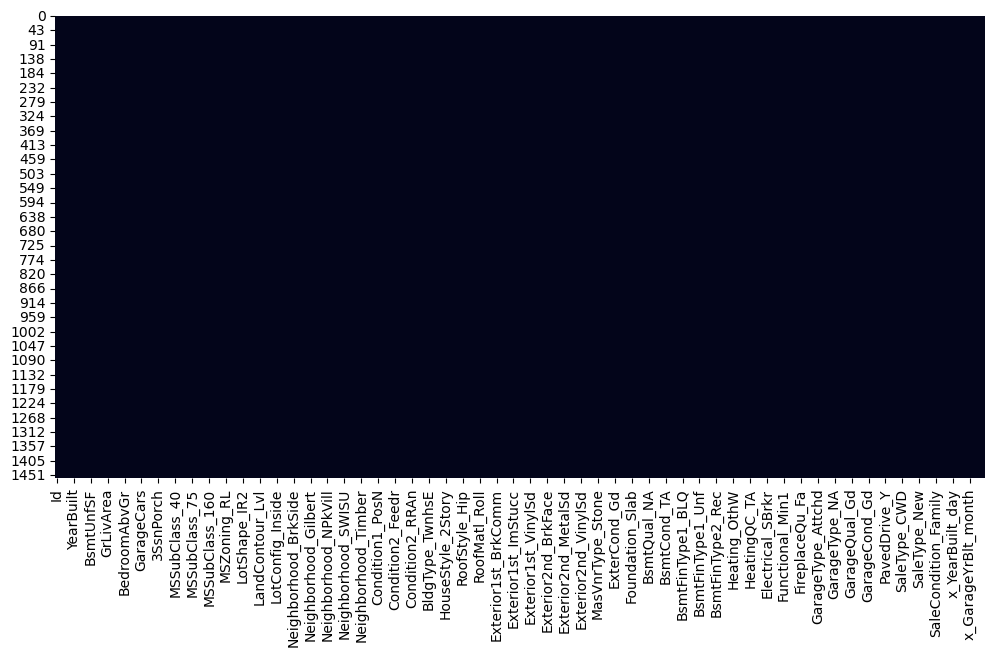

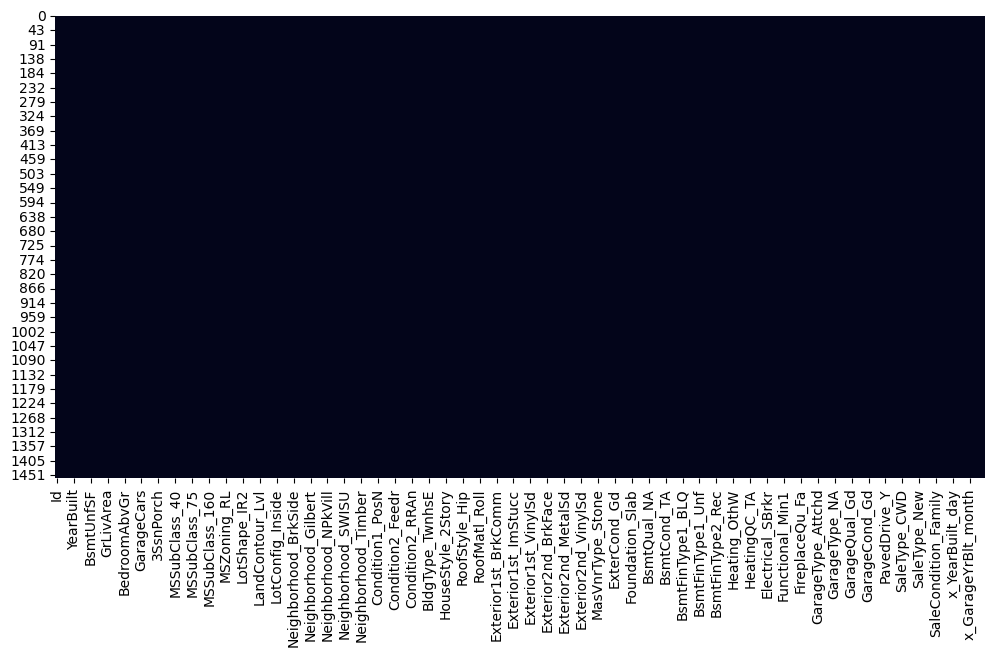

In [119]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)

In [120]:
X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.dtypes

LotFrontage            float64
LotArea                  int64
OverallQual               int8
OverallCond               int8
YearBuilt                int64
                        ...   
x_GarageYrBlt_month      int32
x_GarageYrBlt_day        int32
dateSold_year            int32
dateSold_month           int32
dateSold_day             int32
Length: 273, dtype: object

In [121]:
# show only columns with missing values in X_train
X_train.isnull().sum()[X_train.isnull().sum() > 0]

Series([], dtype: int64)

In [122]:
# build a linear regression model to predict SalePrice


model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [123]:
# show r2 score
r2_score = model.score(X_test, y_test)
print(f"R2 Score: {r2_score}")


R2 Score: 0.8151427214449706


In [124]:
# show model summary
# Ensure only numeric data is passed to statsmodels
X_train_num = X_train.select_dtypes(include=["number"]).copy()
X_train_sm = sm.add_constant(X_train_num, has_constant="add")
model_sm = sm.OLS(y_train, X_train_sm, missing="drop").fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     245.3
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:03:35   Log-Likelihood:                -12428.
No. Observations:                1082   AIC:                         2.492e+04
Df Residuals:                    1049   BIC:                         2.509e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.469e+05   1.42e+05     -1.032      0.302   -4.26e+05    1.32e+05
LotFrontage            100.0202     22.917      4.364      0.000      55.052     144.989
LotArea                  1.1506      0.201      5.718      0.000       0.756       1.545
OverallQual           1.391e+04    967.024     14.383      0.000     1.2e+04    1.58e+04
OverallCond           4911.6650    840.719      5.842      0.000    3261.983    6561.347
YearBuilt              182.5898     28.634      6.377      0.000     126.404     238.775
YearRemodAdd            98.0127     27.717      3.536      0.000      43.626     152.399
MasVnrArea              15.1845      5.721      2.654      0.008       3.958      26.411
BsmtFinSF1              20.8276      2.168      9.605      0.000      16.573      25.083
BsmtFinSF2              -2.2342      3.668     -0.609      0.543      -9.431       4.962
BsmtUnfSF               -0.4042      1.923     -0.210      0.834      -4.177       3.369
TotalBsmtSF             18.1892      2.798      6.500      0.000      12.699      23.680
1stFlrSF                74.5874    117.010      0.637      0.524    -155.013     304.187
2ndFlrSF                75.2427    116.599      0.645      0.519    -153.550     304.036
LowQualFinSF          -172.2967    349.801     -0.493      0.622    -858.685     514.092
GrLivArea              -22.4666    116.274     -0.193      0.847    -250.622     205.689
BsmtFullBath           649.5080   2118.076      0.307      0.759   -3506.640    4805.656
BsmtHalfBath         -7157.5480   3347.054     -2.138      0.033   -1.37e+04    -589.864
FullBath              1192.3056   2342.351      0.509      0.611   -3403.922    5788.533
HalfBath             -2150.8116   2182.311     -0.986      0.325   -6433.003    2131.380
BedroomAbvGr         -8036.3923   1416.343     -5.674      0.000   -1.08e+04   -5257.205
KitchenAbvGr         -2.166e+04   3839.645     -5.642      0.000   -2.92e+04   -1.41e+04
TotRmsAbvGrd          2828.9146   1045.344      2.706      0.007     777.712    4880.117
Fireplaces            3771.9537   1418.332      2.659      0.008     988.862    6555.045
GarageYrBlt             -9.7028      2.661     -3.646      0.000     -14.925      -4.481
GarageCars            6670.4357   2416.714      2.760      0.006    1928.292    1.14e+04
GarageArea              20.6181      8.333      2.474      0.014       4.266      36.970
WoodDeckSF              22.1080      6.521      3.390      0.001       9.312      34.904
OpenPorchSF             18.5808     14.002      1.327      0.185      -8.894      46.056
EnclosedPorch           19.2600     13.650      1.411      0.159      -7.524      46.044
3SsnPorch             -240.6465   1048.191     -0.230      0.818   -2297.436    1816.143
ScreenPorch              5.3182     15.685      0.339    

In [125]:
# load test data
df_test = pd.read_csv("data/test.csv")
# apply the same preprocessing in inference mode
df_test_prep = prepare_data(df_test, for_training=False)

# align columns with training features used by the model
X_cols = X.columns  # columns used to fit the sklearn model
X_test_final = df_test_prep.reindex(columns=X_cols, fill_value=0)

# impute any remaining NaNs with training medians
training_medians = X.median(numeric_only=True)
X_test_final = X_test_final.fillna(training_medians)

# make predictions on test data
predictions = model.predict(X_test_final)
# output predictions to csv
output = pd.DataFrame({"Id": df_test["Id"], "SalePrice": predictions})
output.to_csv("data/submission.csv", index=False)